In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

## Broad analysis on channels

Let us perform a broad analysis on the channels to familiarise ourselves with the data.

In [2]:
PATH_CHANNELS_SRC = 'data/df_channels_en.tsv.gz'

In [8]:
channels_df = pd.read_csv(PATH_CHANNELS_SRC, sep="\t", parse_dates=["join_date"])

In [10]:
print(f'There are a total of {channels_df.shape[0]} channels in the dataset.')
channels_df.head(10)

There are a total of 136470 channels in the dataset


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087
5,Entertainment,2007-01-15,UCIwFjwMjI0y7PDBVEO9-bkQ,Justin Bieber,46574085,134,12.0,2.087
6,Music,2014-03-12,UCFFbwnve3yF62-tVXkTyHqg,Zee Music Company,43451109,4241,13.0,2.087
7,Sports,2009-03-17,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,45800000,213,14.0,2.087
8,Entertainment,2015-05-12,UCk8GzjMOrta8yxDcKfylJYw,✿ Kids Diana Show,34700000,599,16.0,2.087
9,Music,2006-08-08,UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,42000000,154,17.0,2.087


There are a total of $136'470$ channels in the dataset. Each of them having an assigned category, the number of subscribers and the number of videos among other features.

In [11]:
channels_df.describe()

,subscribers_cc,videos_cc,subscriber_rank_sb,weights
count,1.364700e+05,136470.000000,1.364700e+05,136470.000000
mean,2.466022e+05,699.784231,3.570087e+05,7.349363
std,1.150096e+06,4524.980928,2.711139e+05,5.277328
min,1.000000e+04,10.000000,3.000000e+00,2.086500
25%,1.888575e+04,70.000000,1.161305e+05,4.231500
50%,4.240000e+04,175.000000,3.015670e+05,6.444000
75%,1.370000e+05,443.000000,5.704942e+05,9.243500
max,1.121395e+08,461923.000000,1.030844e+06,53.150500


The dataset contains only channels that have at least $10'000$ subscribers. The average content creator has $250'000$ subscribers and publishes $700$ videos.

### Number of subscribers per channel category

In [17]:
sorted_channels_df = channels_df.copy()
sorted_channels_df = sorted_channels_df.sort_values(ascending=False, by='subscribers_cc')
print(f'The top 10 channels by subscribers are:')
sorted_channels_df[['category_cc', 'name_cc', 'subscribers_cc']].head(10)

The top 10 channels by subscribers are:


,category_cc,name_cc,subscribers_cc
55,Music,T-Series,112139463
0,Gaming,PewDiePie,101000000
3,Howto & Style,5-Minute Crafts,60600000
1,Education,Cocomelon - Nursery ...,60100000
2,Entertainment,SET India,56018869
4,Sports,WWE,48400000
5,Entertainment,Justin Bieber,46574085
7,Sports,Dude Perfect,45800000
6,Music,Zee Music Company,43451109
9,Music,Ed Sheeran,42000000


The channel with the most subscribers is the _T-Series_ channel with more than $110'000'000$ subscribers, followed by the _PewDiePie_ channel with $101'000'000$ subscribers.

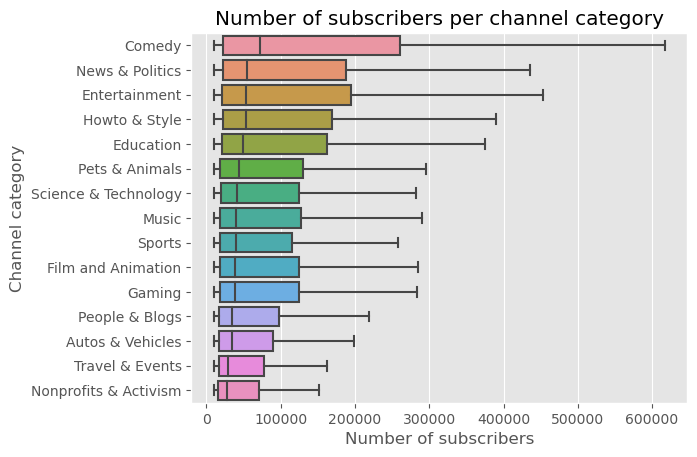

In [15]:
# Order the channels by the number of subscribers per category
grouped = (
    channels_df.loc[:, ["category_cc", "subscribers_cc"]]
    .groupby("category_cc")
    .median()
    .sort_values(by="subscribers_cc", ascending=False)
)

# Plot the categories
sns.boxplot(
    data=channels_df,
    x=channels_df.subscribers_cc,
    y=channels_df.category_cc,
    order=grouped.index,
    showfliers=False,
)
plt.title("Number of subscribers per channel category")
plt.xlabel("Number of subscribers")
plt.ylabel("Channel category")
plt.show()

The channel category with the most number of subscribers is _Comedy_, followed by _News & Politics_ and _Entertainment_. _Travel & Events_ and _Nonprofits & Activism_ have the least number of subscribers.

In [23]:
channels_df.groupby("category_cc").max("subscriber_cc").sort_values(by="subscribers_cc", ascending=False)[['subscribers_cc']]

,subscribers_cc
category_cc,
Music,112139463
Gaming,101000000
Howto & Style,60600000
Education,60100000
Entertainment,56018869
Sports,48400000
Film and Animation,29500000
Comedy,24800000
Nonprofits & Activism,20700000


The channel with the most number of subscribers in the category _Travel & Events_ has $4'900'000$ subscribers, which is $22$ times less than the _T-Series_ channel.

In [24]:
channels_df.join_date.min(), channels_df.join_date.max()

(Timestamp('2004-09-16 00:00:00'), Timestamp('2019-08-23 00:00:00'))

The channels were created from end of $2004$ to end of $2019$.

Text(0, 0.5, 'Number of channels')

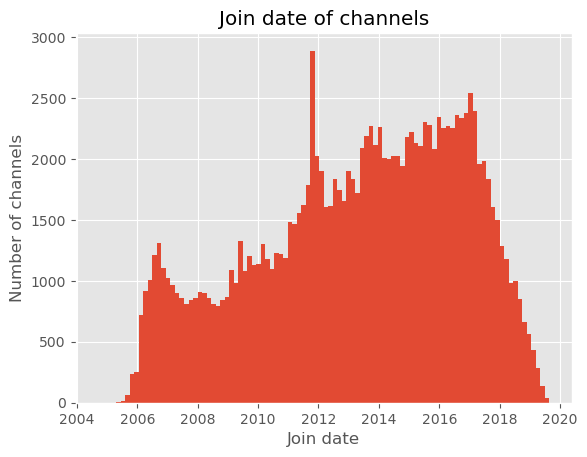

In [27]:
# plot histogram of join dates
channels_df.join_date.hist(bins=100)
plt.title("Join date of channels")
plt.xlabel("Join date")
plt.ylabel("Number of channels")

The decrease in the number of channels joining the platform from $2018$ may be due to the fact that young channels are less likely to reach the $10'000$ subscribers threshold imposed by our dataset.

The channel at index 62 is _YouTube_ itself. It is interesting to note that the channel has no `join_date`.

In [28]:
channels_df.iloc[62].head(65)

category_cc                      Entertainment
join_date                                  NaT
channel               UCBR8-60-B28hp2BmDPdntcQ
name_cc                                YouTube
subscribers_cc                        28200000
videos_cc                                  301
subscriber_rank_sb                       110.0
weights                                  2.087
Name: 62, dtype: object

### Channel with most subscribers

In [29]:
channels_df.loc[channels_df['subscribers_cc'].idxmax()]

category_cc                              Music
join_date                  2006-03-13 00:00:00
channel               UCq-Fj5jknLsUf-MWSy4_brA
name_cc                               T-Series
subscribers_cc                       112139463
videos_cc                                13839
subscriber_rank_sb                       102.0
weights                                  2.087
Name: 55, dtype: object

### Channel with most videos

In [30]:
channels_df.loc[channels_df["videos_cc"].idxmax()]

category_cc                    News & Politics
join_date                  2015-06-17 00:00:00
channel               UCHTK-2W11Vh1V4uwofOfR4w
name_cc                             AP Archive
subscribers_cc                         1770000
videos_cc                               461923
subscriber_rank_sb                      6059.0
weights                                 2.4625
Name: 2795, dtype: object

The channel with the most subscribers is _T-Series_ with more than $110'000'000$ subscribers. The channel with the most videos is _AP Archive_ with more than $460'000$ videos!